In [1]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 11.5 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# Construct a tf.data.Dataset
ds_train = tfds.load(
    'mnist',
    split='train',
    shuffle_files=True,
    as_supervised=True,
)

ds_train = ds_train.cache()
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [40]:
# Logistic regression with keras

number_of_features = 784
number_of_classes = 10
ridge_lambda = 0.01

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes, activation='sigmoid', input_dim=number_of_features, activity_regularizer=tf.keras.regularizers.L2(ridge_lambda)),
])

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

historyADAM = model.fit(
    ds_train,
    epochs=45,
)



Epoch 1/45
469/469 [==============================] - 3s 4ms/step - loss: 12.4099 - sparse_categorical_accuracy: 0.3721
Epoch 2/45
469/469 [==============================] - 2s 3ms/step - loss: 4.9264 - sparse_categorical_accuracy: 0.4141
Epoch 3/45
469/469 [==============================] - 1s 3ms/step - loss: 3.9298 - sparse_categorical_accuracy: 0.4612
Epoch 4/45
469/469 [==============================] - 2s 4ms/step - loss: 3.5225 - sparse_categorical_accuracy: 0.5361
Epoch 5/45
469/469 [==============================] - 1s 3ms/step - loss: 3.2118 - sparse_categorical_accuracy: 0.6282
Epoch 6/45
469/469 [==============================] - 1s 3ms/step - loss: 3.0011 - sparse_categorical_accuracy: 0.7150
Epoch 7/45
469/469 [==============================] - 1s 3ms/step - loss: 2.8643 - sparse_categorical_accuracy: 0.7811
Epoch 8/45
469/469 [==============================] - 2s 4ms/step - loss: 2.8171 - sparse_categorical_accuracy: 0.8225
Epoch 9/45
469/469 [===========================

In [41]:
# Logistic regression with keras

number_of_features = 784
number_of_classes = 10
ridge_lambda = 0.01

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes, activation='sigmoid', input_dim=number_of_features, activity_regularizer=tf.keras.regularizers.L2(ridge_lambda)),
])



model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

historyADAGRAD = model.fit(
    ds_train,
    epochs=45,
)

Epoch 1/45
469/469 [==============================] - 2s 3ms/step - loss: 37.0746 - sparse_categorical_accuracy: 0.4408
Epoch 2/45
469/469 [==============================] - 2s 3ms/step - loss: 16.3229 - sparse_categorical_accuracy: 0.5828
Epoch 3/45
469/469 [==============================] - 2s 5ms/step - loss: 13.0569 - sparse_categorical_accuracy: 0.6172
Epoch 4/45
469/469 [==============================] - 3s 6ms/step - loss: 11.4725 - sparse_categorical_accuracy: 0.6361
Epoch 5/45
469/469 [==============================] - 3s 6ms/step - loss: 10.4778 - sparse_categorical_accuracy: 0.6483
Epoch 6/45
469/469 [==============================] - 2s 4ms/step - loss: 9.7737 - sparse_categorical_accuracy: 0.6584
Epoch 7/45
469/469 [==============================] - 2s 5ms/step - loss: 9.2370 - sparse_categorical_accuracy: 0.6656
Epoch 8/45
469/469 [==============================] - 2s 3ms/step - loss: 8.8095 - sparse_categorical_accuracy: 0.6709
Epoch 9/45
469/469 [=======================

In [42]:
# Logistic regression with keras

number_of_features = 784
number_of_classes = 10
ridge_lambda = 0.01

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes, activation='sigmoid', input_dim=number_of_features, activity_regularizer=tf.keras.regularizers.L2(ridge_lambda)),
])


model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

historyNesterov = model.fit(
    ds_train,
    epochs=45,
)

Epoch 1/45
469/469 [==============================] - 2s 3ms/step - loss: 24.3566 - sparse_categorical_accuracy: 0.3252
Epoch 2/45
469/469 [==============================] - 1s 3ms/step - loss: 14.0300 - sparse_categorical_accuracy: 0.3566
Epoch 3/45
469/469 [==============================] - 1s 3ms/step - loss: 12.9291 - sparse_categorical_accuracy: 0.3893
Epoch 4/45
469/469 [==============================] - 1s 3ms/step - loss: 13.2180 - sparse_categorical_accuracy: 0.4238
Epoch 5/45
469/469 [==============================] - 1s 3ms/step - loss: 12.1952 - sparse_categorical_accuracy: 0.4710
Epoch 6/45
469/469 [==============================] - 1s 3ms/step - loss: 12.3824 - sparse_categorical_accuracy: 0.5101
Epoch 7/45
469/469 [==============================] - 1s 3ms/step - loss: 11.6072 - sparse_categorical_accuracy: 0.5602
Epoch 8/45
469/469 [==============================] - 1s 3ms/step - loss: 11.3431 - sparse_categorical_accuracy: 0.6043
Epoch 9/45
469/469 [====================

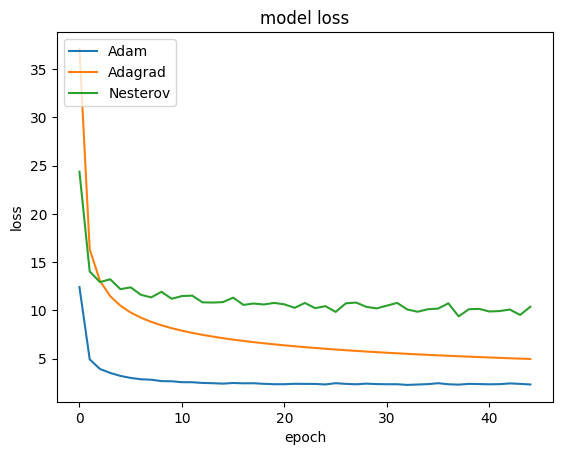

In [43]:
import matplotlib.pyplot as plt


plt.plot(historyADAM.history['loss'])
plt.plot(historyADAGRAD.history['loss'])
plt.plot(historyNesterov.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adam', 'Adagrad', 'Nesterov'], loc='upper left')
plt.show()